In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Vamos a leer los archivos Salinidad y Sargento.
#Tenemos que hacer que ambos archivos empiezen y terminen el mismo día y hora
#
dfsal=pd.read_csv("sargento-salinidad-201117.csv", skiprows=3, sep=',')
dfsar=pd.read_csv("sargento_201117.csv", skiprows=2, sep=',')

#Vamos a ponerle nuevamente las columnas que le quitamos para que iniciaran en la misma fecha y hora
dfsal.columns=['#','Date Time GMT 7','Cond High Rng S/cm','TempC','Specific Conductance S/cm','Salinity']
dfsar.columns=['#','Date Time GMT 7','Abs Pres kPa','TempC','WaterLevel']

In [3]:
dfsal.head()

,#,Date Time GMT 7,Cond High Rng S/cm,TempC,Specific Conductance S/cm,Salinity
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117


In [4]:
dfsar.head()

,#,Date Time GMT 7,Abs Pres kPa,TempC,WaterLevel
0,2,10/26/2017 13:15:00,105.513,24.351,-0.160
1,3,10/26/2017 13:30:00,105.433,24.351,-0.168
2,4,10/26/2017 13:45:00,105.385,24.351,-0.173
3,5,10/26/2017 14:00:00,105.321,24.351,-0.179
4,6,10/26/2017 14:15:00,105.273,24.351,-0.184


In [5]:
#Sargento tiene un archivo al final de más que Salinidad, así que lo vamos a quitar
dfsar=dfsar[:-1]

In [6]:
dfsar.head(3000)

,#,Date Time GMT 7,Abs Pres kPa,TempC,WaterLevel
0,2,10/26/2017 13:15:00,105.513,24.351,-0.160
1,3,10/26/2017 13:30:00,105.433,24.351,-0.168
2,4,10/26/2017 13:45:00,105.385,24.351,-0.173
3,5,10/26/2017 14:00:00,105.321,24.351,-0.179
4,6,10/26/2017 14:15:00,105.273,24.351,-0.184
5,7,10/26/2017 14:30:00,105.225,24.351,-0.189
6,8,10/26/2017 14:45:00,105.177,24.351,-0.193
7,9,10/26/2017 15:00:00,105.145,24.351,-0.196
8,10,10/26/2017 15:15:00,105.113,24.351,-0.200
9,11,10/26/2017 15:30:00,105.097,24.351,-0.201


In [7]:
dfsal.head(3000)

,#,Date Time GMT 7,Cond High Rng S/cm,TempC,Specific Conductance S/cm,Salinity
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117
5,8,10/26/2017 14:30:00,54525.5,24.70,54848.7,36.3279
6,9,10/26/2017 14:45:00,54525.5,24.69,54859.5,36.3360
7,10,10/26/2017 15:00:00,54525.5,24.67,54881.2,36.3521
8,11,10/26/2017 15:15:00,54525.5,24.67,54881.2,36.3521
9,12,10/26/2017 15:30:00,54525.5,24.66,54892.0,36.3602


In [8]:
#Antes avanzar, hay que checar el tipo de objeto que son
dfsal.dtypes

#                              int64
Date Time GMT 7               object
Cond High Rng S/cm           float64
TempC                        float64
Specific Conductance S/cm    float64
Salinity                     float64
dtype: object

In [9]:
dfsar.dtypes

#                    int64
Date Time GMT 7     object
Abs Pres kPa       float64
TempC              float64
WaterLevel         float64
dtype: object

In [10]:
#Tenemos en ambos casos que lee la fecha como objeto en lugar de punto flotante, así que debemos cambiar eso.
#
#Primero con dfsal
dfsal['Date'] = pd.to_datetime(dfsal['Date Time GMT 7'], format='%m/%d/%Y %H:%M:%S')
dfsal['month'] = dfsal['Date'].dt.month

dfsal.head()

,#,Date Time GMT 7,Cond High Rng S/cm,TempC,Specific Conductance S/cm,Salinity,Date,month
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117,2017-10-26 14:15:00,10


In [11]:
#Después con dfsar
dfsar['Date'] = pd.to_datetime(dfsar['Date Time GMT 7'], format='%m/%d/%Y %H:%M:%S')
dfsar['month'] = dfsar['Date'].dt.month

dfsar.head()

,#,Date Time GMT 7,Abs Pres kPa,TempC,WaterLevel,Date,month
0,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
1,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
2,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
3,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10
4,6,10/26/2017 14:15:00,105.273,24.351,-0.184,2017-10-26 14:15:00,10


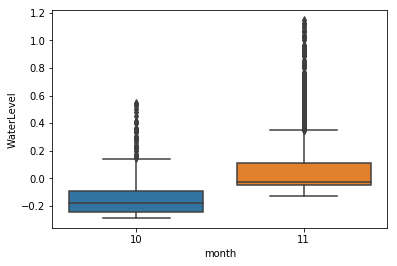

In [12]:
#Con los archivos listos, vamos a graficar por Seaborn.
import seaborn as sns

#Boxpot de Water Level (dfsar)
ax = sns.boxplot(x="month", y="WaterLevel", data=dfsar)
plt.show()

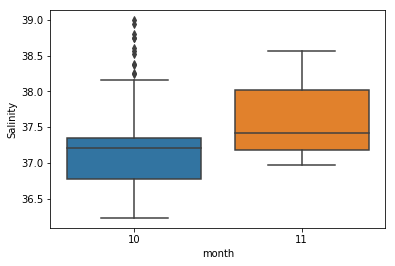

In [13]:
#Boxplot de Salinidad ppt (dfsal)
ax = sns.boxplot(x="month", y="Salinity", data=dfsal)
plt.show()

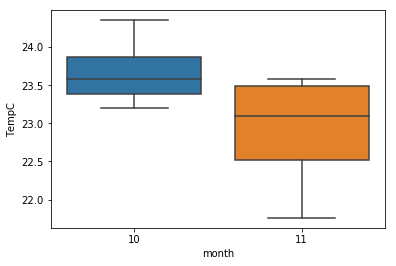

In [14]:
#Boxplot de la Temperatura del agua (cualquier variable)
ax = sns.boxplot(x="month", y="TempC", data=dfsar)
plt.show()

In [15]:
#Para saber la información exacta de los cuartiles, la mediana, y el número de datos pedimos un describe

#Con sal
dfsal.describe()

,#,Cond High Rng S/cm,TempC,Specific Conductance S/cm,Salinity,month
count,2393.00000,2393.000000,2393.000000,2393.000000,2393.000000,2393.000000
mean,1199.00000,54524.972587,23.315980,56387.569118,37.480289,10.781446
std,690.94392,11.879147,0.546177,618.579547,0.464286,0.413352
min,3.00000,54105.700000,21.490000,54719.000000,36.231100,10.000000
25%,601.00000,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,1199.00000,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,1797.00000,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,2395.00000,54525.500000,24.820000,58398.700000,38.994200,11.000000


In [16]:
#Con sar
dfsar.describe()

,#,Abs Pres kPa,TempC,WaterLevel,month
count,2393.00000,2393.000000,2393.000000,2393.000000,2393.000000
mean,1198.00000,107.430767,23.120328,0.030939,10.781446
std,690.94392,2.372048,0.563019,0.235994,0.413352
min,2.00000,104.229000,21.760000,-0.288000,10.000000
25%,600.00000,106.407000,22.525000,-0.071000,11.000000
50%,1198.00000,106.764000,23.388000,-0.035000,11.000000
75%,1796.00000,107.307000,23.484000,0.019000,11.000000
max,2394.00000,118.641000,24.351000,1.146000,11.000000


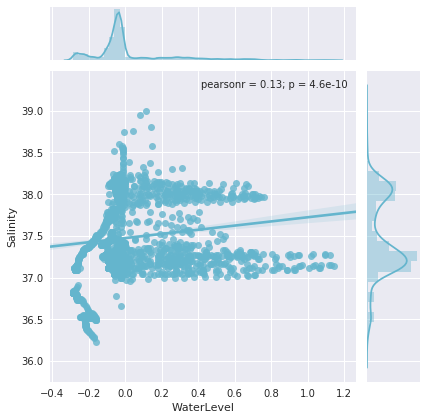

In [17]:
#Vamos a concatar los archivos
# Gráfica de Nivel de mar-Salinidad
sns.set(style="darkgrid", color_codes=True)
dfconjunto=pd.concat([dfsal, dfsar], axis=1, join_axes=[dfsar.index])
grafica = sns.jointplot("WaterLevel", "Salinity", data=dfconjunto, kind="reg", color="c")
plt.show(grafica)

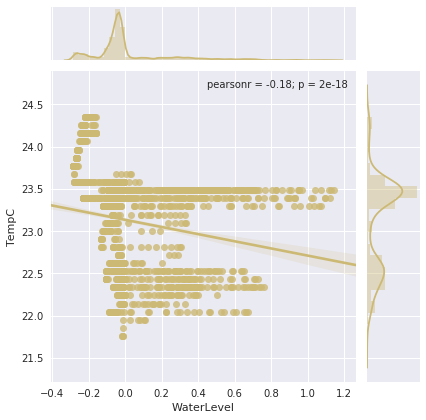

In [18]:
#Grafica de Nivel de mar-Temperatura del agua
sns.set(style="darkgrid", color_codes=True)
grafica = sns.jointplot("WaterLevel", "TempC", data=dfsar, kind="reg", color="y")
plt.show(grafica)

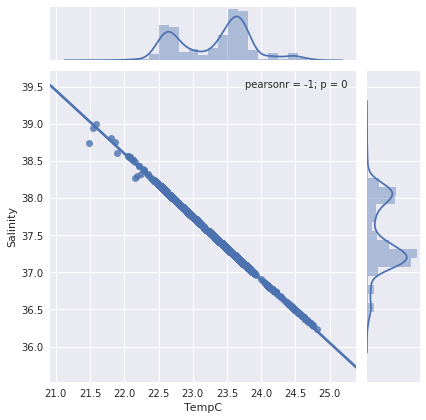

In [19]:
#Gráfica de Salinidad-Temperatura del agua
sns.set(style="darkgrid", color_codes=True)
grafica = sns.jointplot("TempC", "Salinity", data=dfsal, kind="reg", color="b")
plt.show(grafica)

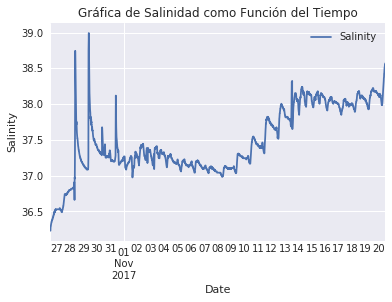

In [20]:
#Realizar 3 gráficas independientes de:

#Salinidad
dfsal1=dfsal[['Date','Salinity']]
plt.figure(); dfsal1.plot(x='Date'); plt.legend(loc='best')
plt.title('Gráfica de Salinidad como Función del Tiempo')
plt.xlabel('Date')
plt.ylabel('Salinity')
plt.grid(True)
plt.show()

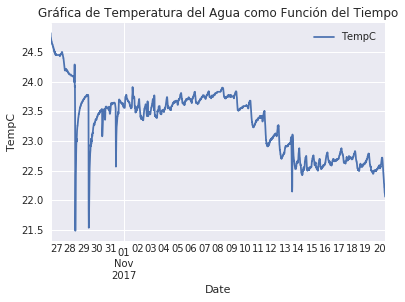

In [22]:
#Temperatura del Agua
dfsal1=dfsal[['Date','TempC']]
plt.figure(); dfsal1.plot(x='Date'); plt.legend(loc='best')
plt.title('Gráfica de Temperatura del Agua como Función del Tiempo')
plt.xlabel('Date')
plt.ylabel('TempC')
plt.grid(True)
plt.show()

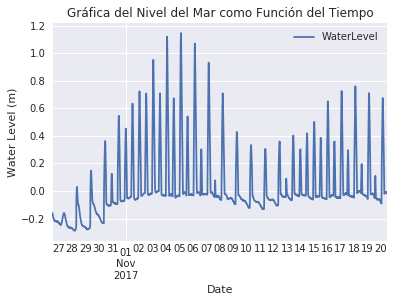

In [23]:
#Nivel del mar
dfsar1=dfsar[['Date','WaterLevel']]
plt.figure(); dfsar1.plot(x='Date'); plt.legend(loc='best')
plt.title('Gráfica del Nivel del Mar como Función del Tiempo')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.grid(True)
plt.show()

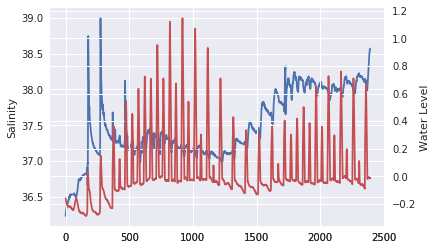

In [24]:
#Por úlitmo, gráficas de doble eje de:

#Nivel de mar y Salinidad
from pylab import figure, show, legend, ylabel
fig1 = figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dfconjunto['Salinity'], 'b-')
ylabel("Salinity")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dfconjunto['WaterLevel'], 'xr-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Water Level")

show()

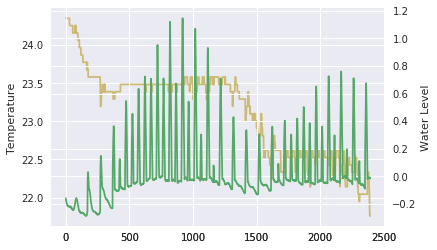

In [25]:
#Nivel de mar y Temperatura
from pylab import figure, show, legend, ylabel
fig1 = figure()

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dfsar['TempC'], 'y')
ylabel("Temperature")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dfsar['WaterLevel'], 'xg-')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Water Level")

show()

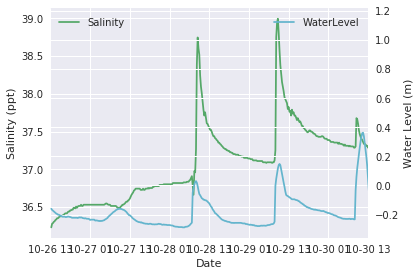

In [26]:
#Hay que ponerle límite al eje x de 5 días en cada gráfica de doble eje que acabamos de realizar

#Nivel de mar y Salinidad
#Grafica de doble eje Salinidad y nivel del mar
fig, ax1 = plt.subplots()
x=dfsal['Date']
Sal=dfconjunto.Salinity
Water=dfconjunto.WaterLevel

ax1.plot(x,Sal,'g-', label='Salinity'); plt.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity (ppt)')

ax2 = ax1.twinx()
ax2.plot(x, Water, 'c-', label='WaterLevel'); plt.legend(loc='upper right')
ax2.set_ylabel('Water Level (m)')

fig.tight_layout()
plt.xlim(("2017-10-26 13:00:00","2017-10-30 13:00:00"))
plt.show()

In [27]:
dfconjunto.head()

,#,Date Time GMT 7,Cond High Rng S/cm,TempC,Specific Conductance S/cm,Salinity,Date,month,#,Date Time GMT 7,Abs Pres kPa,TempC,WaterLevel,Date,month
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117,2017-10-26 14:15:00,10,6,10/26/2017 14:15:00,105.273,24.351,-0.184,2017-10-26 14:15:00,10


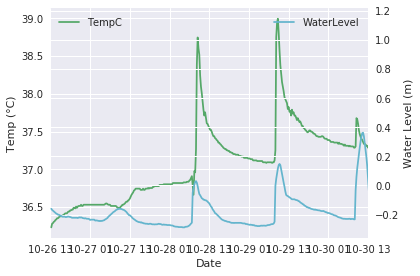

In [28]:
#Nivel de mar y Temperatura
fig, ax1 = plt.subplots()
x=dfsal['Date']
Temp=dfconjunto.TempC
Water=dfconjunto.WaterLevel

ax1.plot(x,Sal,'g-', label='TempC'); plt.legend(loc='upper left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temp (°C)')

ax2 = ax1.twinx()
ax2.plot(x, Water, 'c-', label='WaterLevel'); plt.legend(loc='upper right')
ax2.set_ylabel('Water Level (m)')

fig.tight_layout()
plt.xlim(("2017-10-26 13:00:00","2017-10-30 13:00:00"))
plt.show()